In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load Datasets
df = pd.read_csv('data/raw_data.csv')

In [3]:
df.shape

(36975, 14)

In [4]:
df.sample(5)

,stationID,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
24183,69t,2023-10-16 11:00:00,15.0,NaN,41.0,NaN,NaN,NaN,1.0,13,32.5,63,745,0.0
15527,40t,2023-09-15 10:00:00,6.0,NaN,NaN,NaN,NaN,NaN,0.2,57,26.0,0,0,0.0
36468,98t,2023-10-08 11:00:00,12.0,24.0,23.0,0.34,1.0,2.0,1.4,222,31.6,68,752,0.0
12449,33t,2023-08-25 12:00:00,10.0,NaN,NaN,NaN,NaN,NaN,0.2,3,0.0,0,0,0.0
20644,58t,2023-09-18 12:00:00,3.0,6.0,NaN,NaN,NaN,NaN,0.6,197,28.3,79,731,0.4


In [5]:
df.describe()

,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
count,36236.000000,19302.000000,15441.000000,12691.000000,12247.000000,7910.000000,36975.000000,36975.000000,36975.000000,36975.000000,36975.000000,36975.000000
mean,14.142979,27.990519,22.596723,0.451799,5.466318,1.744248,1.469872,165.413279,26.553212,52.834212,528.813496,3.682672
std,7.034007,12.716057,11.703609,0.459732,6.395837,5.563819,7.036966,111.230903,10.640354,32.340746,4241.059912,479.662715
min,1.000000,4.000000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,19.000000,14.000000,0.220000,2.000000,1.000000,0.200000,51.000000,27.200000,42.000000,0.000000,0.000000
50%,13.000000,26.000000,21.000000,0.340000,4.000000,1.000000,0.800000,192.000000,30.000000,63.000000,742.000000,0.000000
75%,18.000000,34.000000,29.000000,0.500000,6.000000,1.000000,1.700000,254.000000,32.000000,75.000000,754.000000,0.000000
max,76.000000,156.000000,231.000000,10.830000,179.000000,190.000000,335.500000,360.000000,104.000000,101.000000,813277.000000,65468.200000


In [6]:
# Drop column stationID
df = df.drop(['stationID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36975 entries, 0 to 36974
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  36975 non-null  object 
 1   PM25          36236 non-null  float64
 2   PM10          19302 non-null  float64
 3   O3            15441 non-null  float64
 4   CO            12691 non-null  float64
 5   NO2           12247 non-null  float64
 6   SO2           7910 non-null   float64
 7   WS            36975 non-null  float64
 8   WD            36975 non-null  int64  
 9   TEMP          36975 non-null  float64
 10  RH            36975 non-null  int64  
 11  BP            36975 non-null  int64  
 12  RAIN          36975 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 3.7+ MB


In [7]:
df.sample(5)

,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH,BP,RAIN
19119,2023-10-23 12:00:00,18.0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0,0.0
3821,2023-10-24 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0,0.0
29655,2023-10-06 08:00:00,10.0,33.0,8.0,0.3,2.0,1.0,2.1,129,27.5,79,737,0.0
14579,2023-08-26 12:00:00,7.0,NaN,NaN,NaN,NaN,NaN,1.7,260,30.4,55,726,0.0
595,2023-09-04 08:00:00,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0,29.9,0,0,0.0


In [8]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(df.duplicated().any()))
print('The total number of null values in each colum:')
display(df.isnull().sum())

Are there any duplicated values in our data ? : True

The total number of null values in each colum:


DATETIMEDATA        0
PM25              739
PM10            17673
O3              21534
CO              24284
NO2             24728
SO2             29065
WS                  0
WD                  0
TEMP                0
RH                  0
BP                  0
RAIN                0
dtype: int64

In [9]:
# fill in the missing values with the mean of the particular column
means = df.drop(columns='DATETIMEDATA').mean()
df.fillna(value=means, inplace=True)
# let's check the data again if there are any missing values
df.isnull().any()

DATETIMEDATA    False
PM25            False
PM10            False
O3              False
CO              False
NO2             False
SO2             False
WS              False
WD              False
TEMP            False
RH              False
BP              False
RAIN            False
dtype: bool

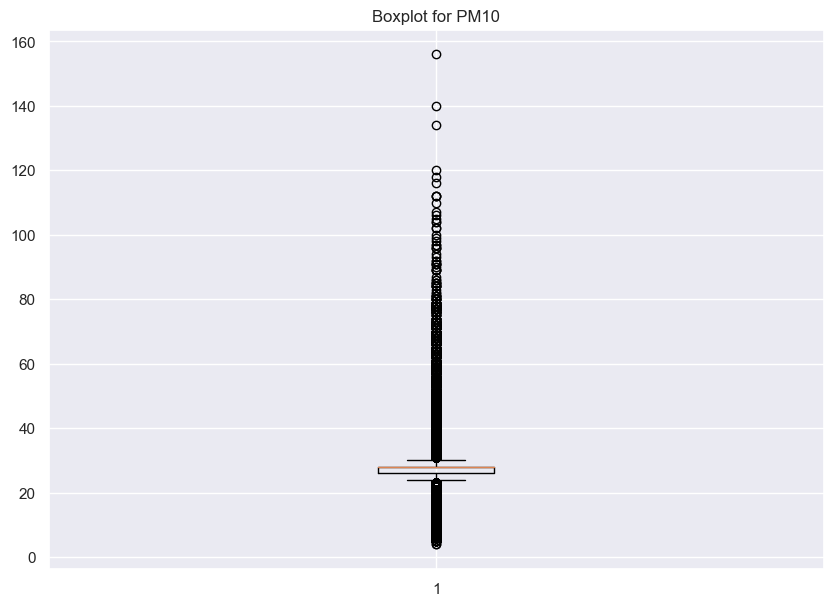

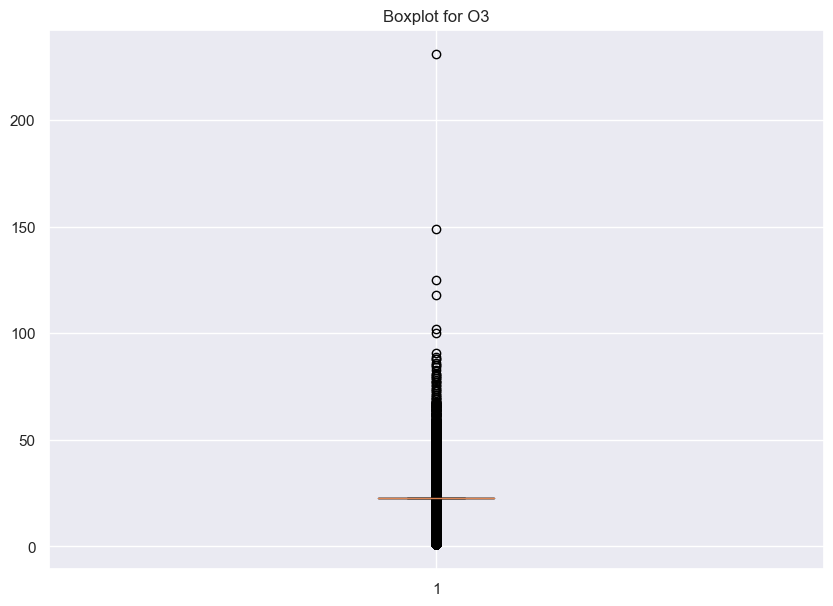

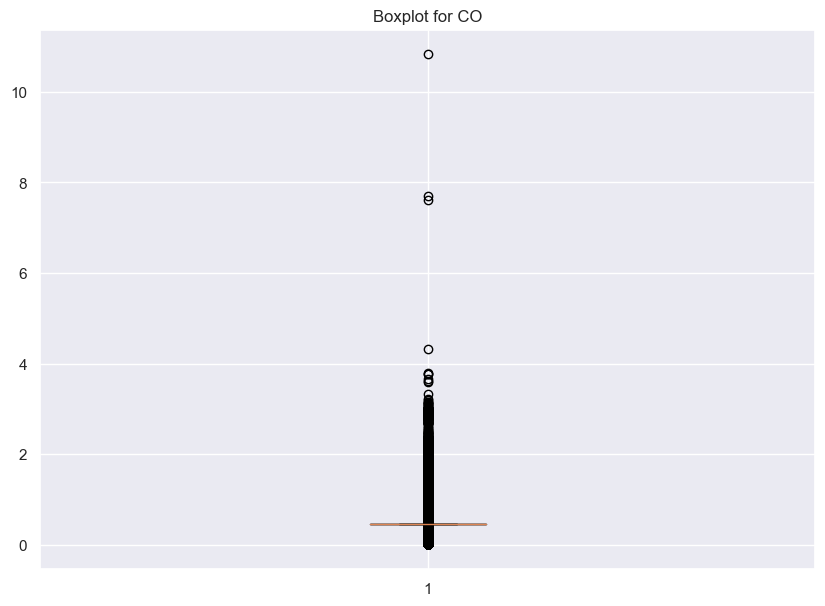

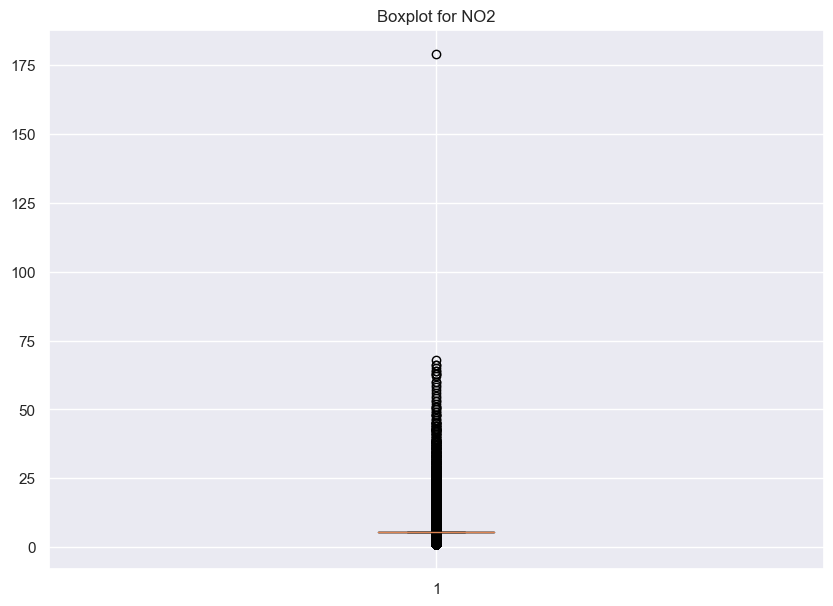

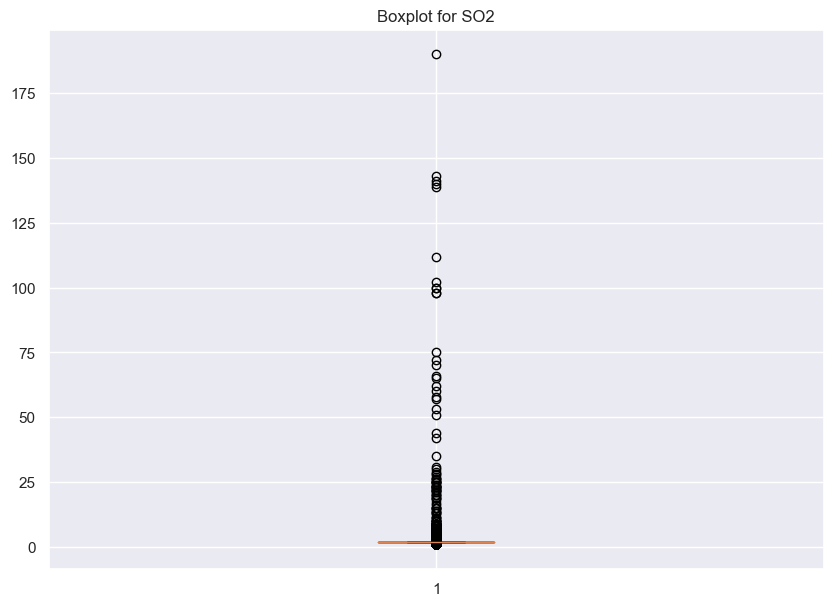

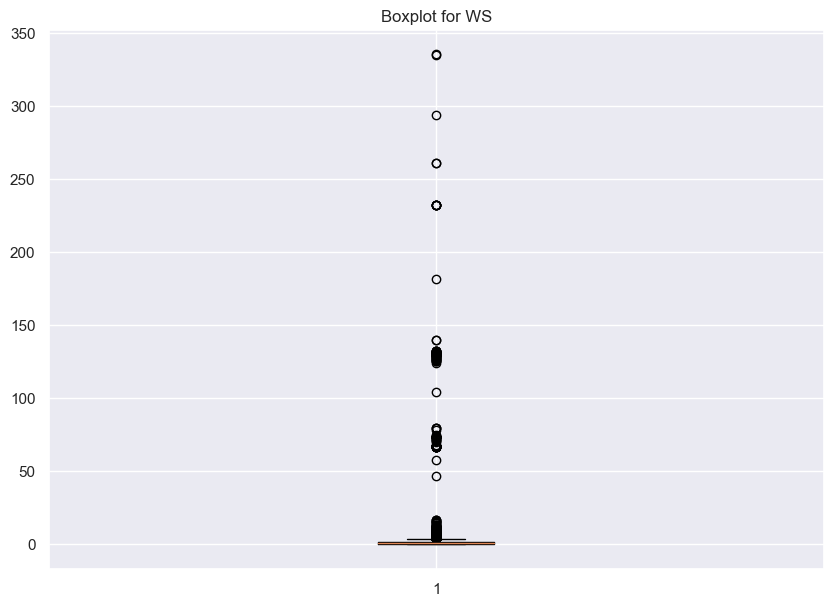

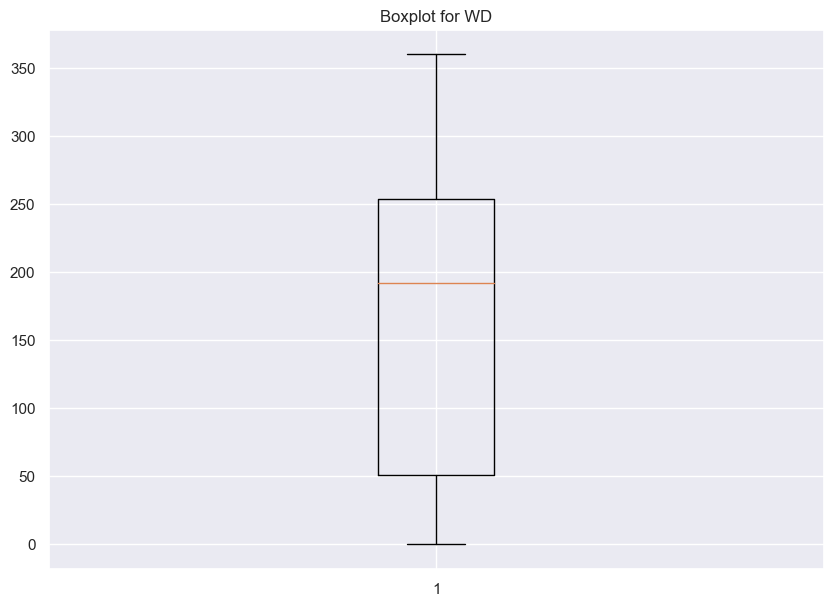

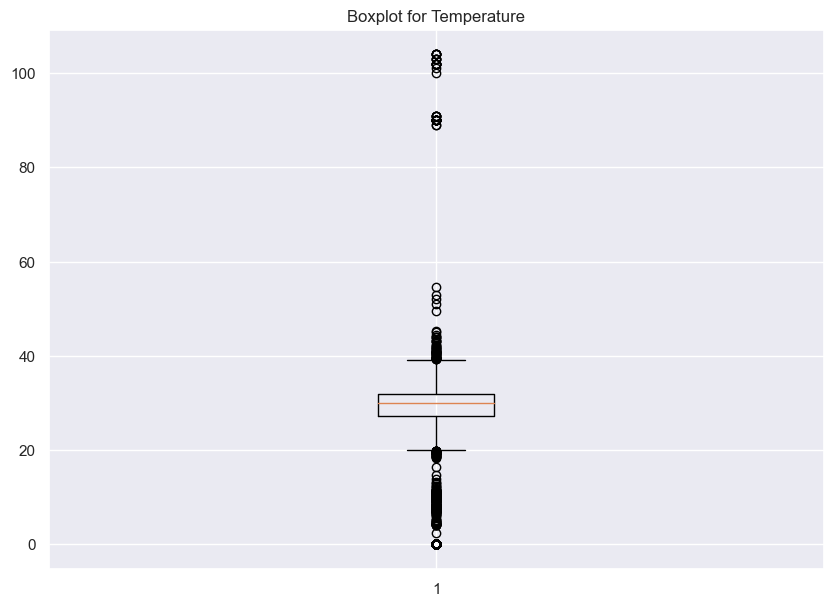

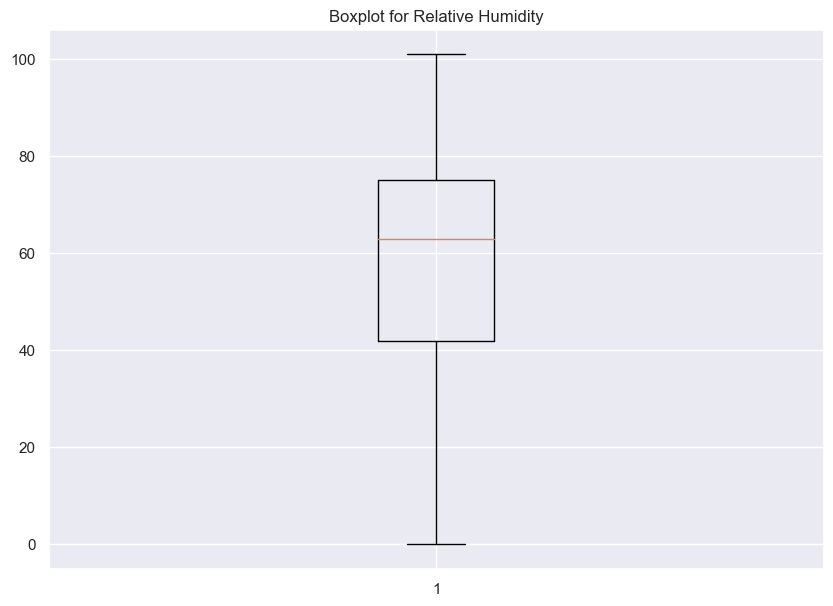

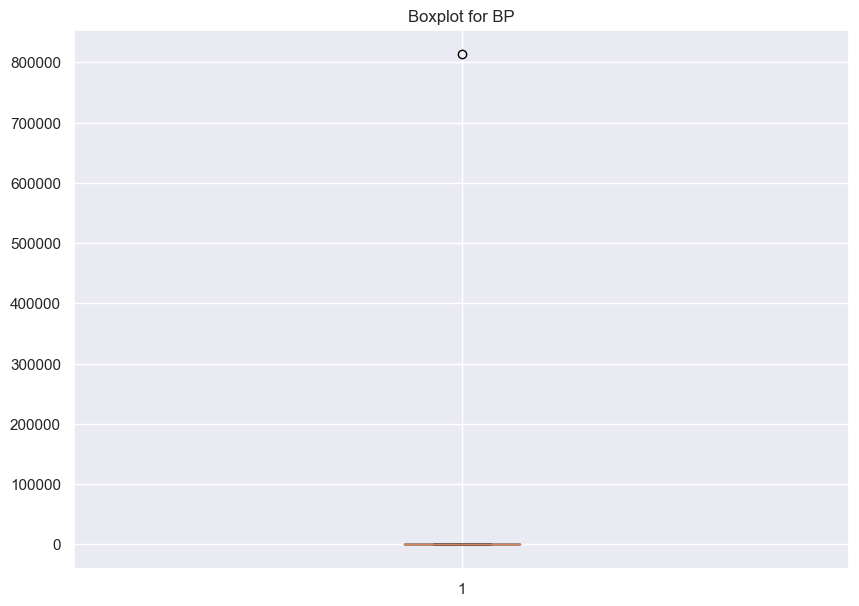

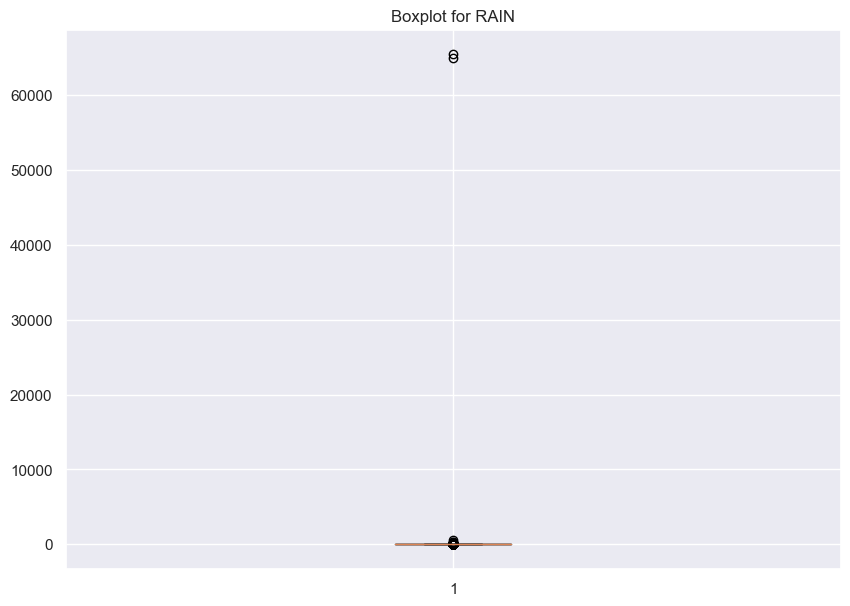

In [10]:
# รายการข้อมูลและชื่อแกน x
data = [['PM10', 'PM10'],
        ['O3', 'O3'],
        ['CO', 'CO'],
        ['NO2', 'NO2'],
        ['SO2', 'SO2'],
        ['WS', 'WS'],
        ['WD', 'WD'],
        ['TEMP', 'Temperature'],
        ['RH', 'Relative Humidity'],
        ['BP', 'BP'],
        ['RAIN', 'RAIN']]

# สร้างแผนภูมิในลูป
for item in data:
    fig = plt.figure(figsize=(10, 7))
    plt.boxplot(df[item[0]])
    plt.title(f'Boxplot for {item[1]}')
    plt.show()

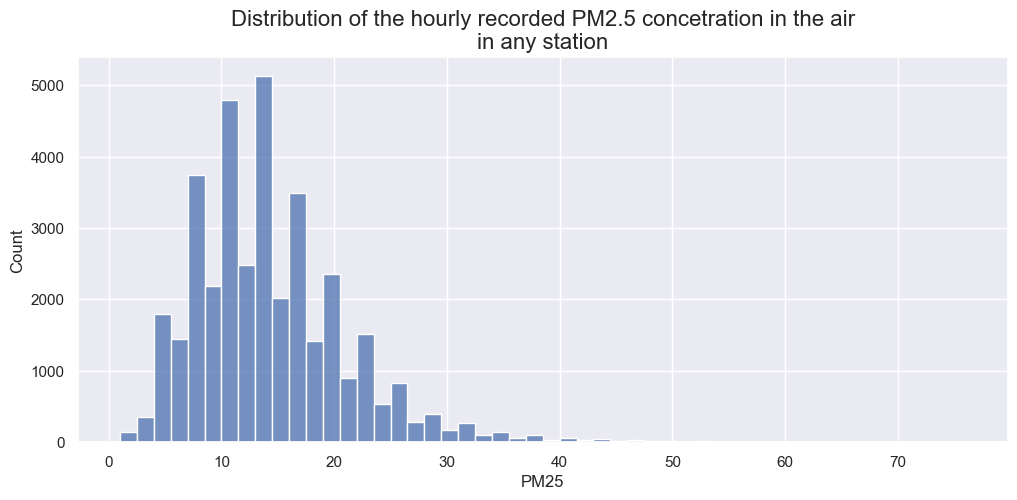

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(df['PM25'],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air\nin any station',
          fontsize=16)
plt.show()

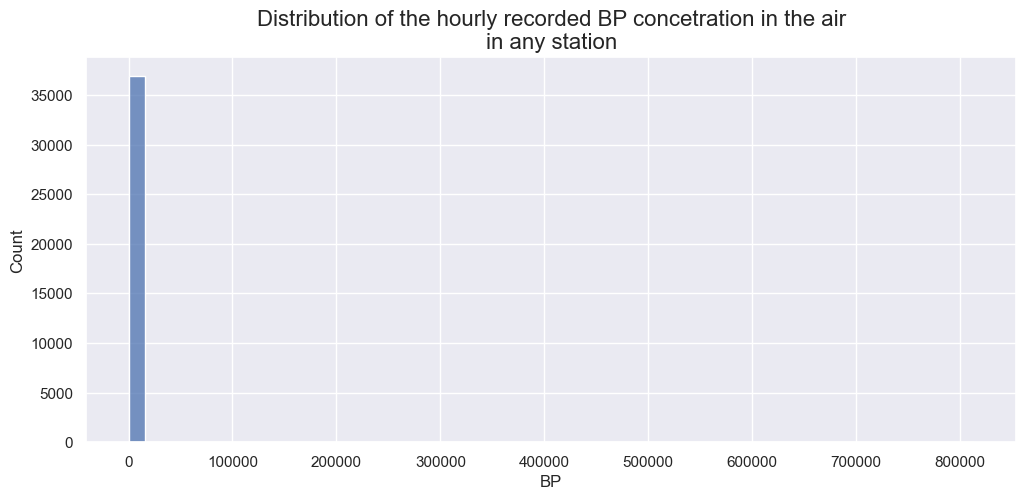

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(df['BP'],bins=50)
plt.title('Distribution of the hourly recorded BP concetration in the air\nin any station',
          fontsize=16)
plt.show()

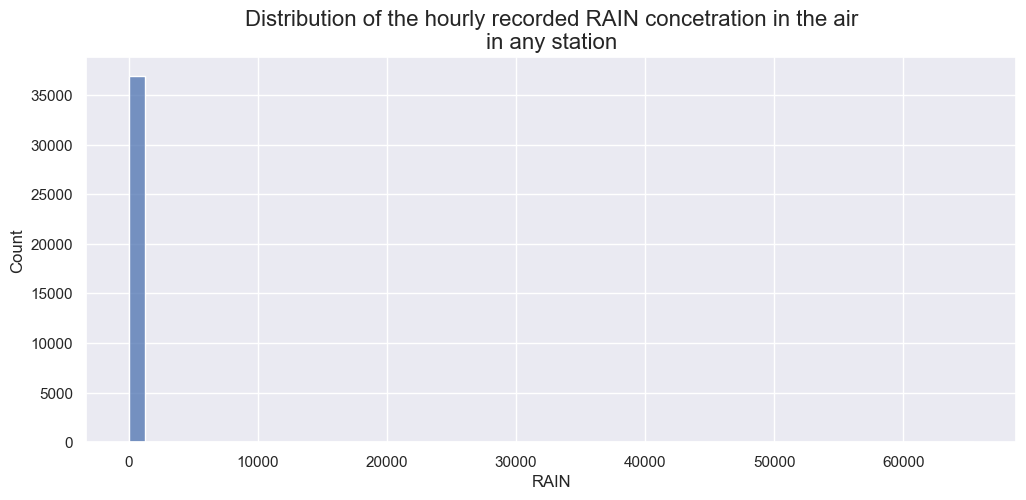

In [13]:
plt.figure(figsize=(12,5))
sns.histplot(df['RAIN'],bins=50)
plt.title('Distribution of the hourly recorded RAIN concetration in the air\nin any station',
          fontsize=16)
plt.show()

In [14]:
selected_columns = df[['PM25', 'PM10', 'O3', 'CO', 'NO2', 'SO2', 'WS', 'WD', 'TEMP', 'RH']]
selected_columns

,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH
0,16.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,308,30.7,69
1,14.0,27.990519,22.596723,0.451799,5.466318,1.744248,1.2,285,32.0,63
2,12.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.3,329,33.7,57
3,14.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,330,33.7,55
4,15.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.4,324,33.5,55
...,...,...,...,...,...,...,...,...,...,...
36970,26.0,56.000000,20.000000,0.760000,20.000000,1.000000,2.3,83,30.4,60
36971,14.0,32.000000,26.000000,0.610000,18.000000,1.000000,2.4,88,31.5,58
36972,16.0,32.000000,22.596723,0.451799,14.000000,1.744248,2.9,71,32.7,53
36973,13.0,25.000000,28.000000,0.520000,18.000000,1.000000,2.7,69,33.4,49


In [15]:
# Export dataframe
selected_columns.to_csv('data/data_with_prep.csv', index=False)